In [1]:
# Libraries
import gpflow
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from waveome import (
    model_classes,
    kernels,
    model_search,
    likelihoods
)
from waveome.utilities import calc_deviance_explained

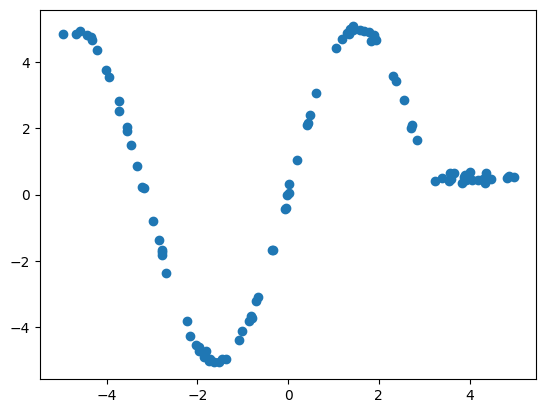

In [2]:
# Simulate some data
np.random.seed(9102)
N = 100
X = np.random.uniform(low=-5, high=5, size=(N, 1))

# Prediction points for later
num_pred_points = 1000
xnew = np.linspace(-5, 5, num_pred_points).reshape(-1, 1)

# Outcome is sin with unit specific offset
# Y = (np.sin(X[:, 1] + X[:, 0]) + X[:, 0] + np.random.normal(scale=.1, size=N)).reshape(-1, 1)
Y = 5 * np.sin(X)
Y[X >= 3] = 0.5
Y += np.random.normal(scale=.1, size=(N, 1))

# Plot the function
plt.scatter(X, Y)
plt.show()

In [3]:
# Make base class
gp = model_classes.BaseGP(
    X=X,
    Y=Y,
    kernel=gpflow.kernels.SquaredExponential(),
    verbose=True
)
print(gpflow.utilities.print_summary(gp))

╒════════════════════════════╤═══════════╤══════════════════╤═════════╤═════════════╤═══════════════╤═════════╤══════════════════╕
│ name                       │ class     │ transform        │ prior   │ trainable   │ shape         │ dtype   │ value            │
╞════════════════════════════╪═══════════╪══════════════════╪═════════╪═════════════╪═══════════════╪═════════╪══════════════════╡
│ BaseGP.mean_function.c     │ Parameter │ Identity         │         │ True        │ ()            │ float64 │ 0.0              │
├────────────────────────────┼───────────┼──────────────────┼─────────┼─────────────┼───────────────┼─────────┼──────────────────┤
│ BaseGP.kernel.variance     │ Parameter │ Softplus         │         │ True        │ ()            │ float64 │ 1.0              │
├────────────────────────────┼───────────┼──────────────────┼─────────┼─────────────┼───────────────┼─────────┼──────────────────┤
│ BaseGP.kernel.lengthscales │ Parameter │ Softplus         │         │ True       

In [4]:
# Randomize initial values and then optimize hyperparameters
gp.randomize_params(random_seed=9102)
gp.optimize_params(data=(X, Y))
gp

Number of params: 105,  using Scipy optimizer
╒════════════════════════════╤═══════════╤══════════════════╤═════════╤═════════════╤═══════════════╤═════════╤═══════════════════════╕
│ name                       │ class     │ transform        │ prior   │ trainable   │ shape         │ dtype   │ value                 │
╞════════════════════════════╪═══════════╪══════════════════╪═════════╪═════════════╪═══════════════╪═════════╪═══════════════════════╡
│ BaseGP.mean_function.c     │ Parameter │ Identity         │         │ True        │ ()            │ float64 │ -0.34490179219219397  │
├────────────────────────────┼───────────┼──────────────────┼─────────┼─────────────┼───────────────┼─────────┼───────────────────────┤
│ BaseGP.kernel.variance     │ Parameter │ Softplus         │         │ True        │ ()            │ float64 │ 0.3487214734071421    │
├────────────────────────────┼───────────┼──────────────────┼─────────┼─────────────┼───────────────┼─────────┼───────────────────────┤
│ 

name,class,transform,prior,trainable,shape,dtype,value
BaseGP.mean_function.c,Parameter,Identity,,True,(),float64,1.01158
BaseGP.kernel.variance,Parameter,Softplus,,True,(),float64,6.63917
BaseGP.kernel.lengthscales,Parameter,Softplus,,True,(),float64,1.31989
BaseGP.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,0.010996003334399892
BaseGP.inducing_variable.Z,Parameter,Identity,,False,"(100, 1)",float64,[[-4.02011...
BaseGP.q_mu,Parameter,Identity,,True,"(100, 1)",float64,[[1.09613000e+00...
BaseGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 100, 100)",float64,"[[[1.48042485e-02, 0.00000000e+00, 0.00000000e+00..."


In [5]:
# Show that we can do this process a number of times to search parameter space easier
gp.random_restart_optimize(data=(X,Y), num_restart=3)

Random restart 1
Number of params: 105,  using Scipy optimizer
╒════════════════════════════╤═══════════╤══════════════════╤═════════╤═════════════╤═══════════════╤═════════╤═══════════════════════╕
│ name                       │ class     │ transform        │ prior   │ trainable   │ shape         │ dtype   │ value                 │
╞════════════════════════════╪═══════════╪══════════════════╪═════════╪═════════════╪═══════════════╪═════════╪═══════════════════════╡
│ BaseGP.mean_function.c     │ Parameter │ Identity         │         │ True        │ ()            │ float64 │ -1.18262              │
├────────────────────────────┼───────────┼──────────────────┼─────────┼─────────────┼───────────────┼─────────┼───────────────────────┤
│ BaseGP.kernel.variance     │ Parameter │ Softplus         │         │ True        │ ()            │ float64 │ 0.16074756109100233   │
├────────────────────────────┼───────────┼──────────────────┼─────────┼─────────────┼───────────────┼─────────┼──────────

In [6]:
gp

name,class,transform,prior,trainable,shape,dtype,value
BaseGP.mean_function.c,Parameter,Identity,,True,(),float64,1.07728
BaseGP.kernel.variance,Parameter,Softplus,,True,(),float64,7.09834
BaseGP.kernel.lengthscales,Parameter,Softplus,,True,(),float64,1.22914
BaseGP.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,0.010186115459763797
BaseGP.inducing_variable.Z,Parameter,Identity,,False,"(100, 1)",float64,[[-4.02011...
BaseGP.q_mu,Parameter,Identity,,True,"(100, 1)",float64,[[1.03139000e+00...
BaseGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 100, 100)",float64,"[[[-1.36037777e-02, 0.00000000e+00, 0.00000000e+00..."


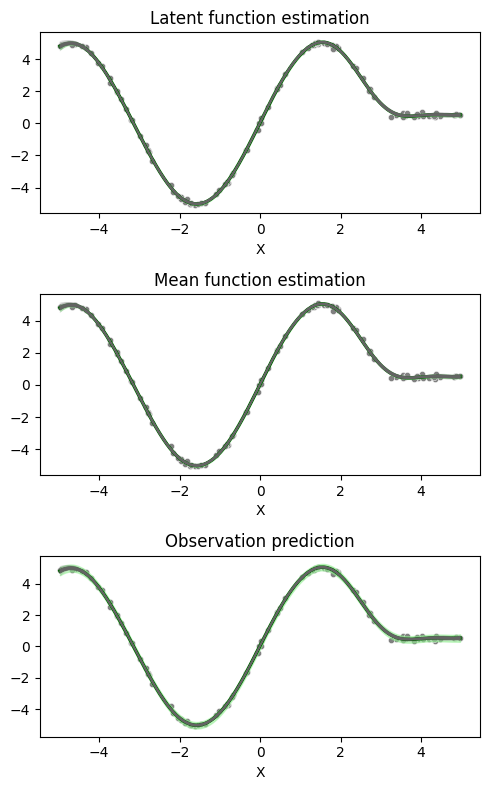

In [7]:
# Now plot the resulting model predictions 
# (first two are the same given the gaussian likelihood)
figs, axs = plt.subplots(3, 1, figsize=(5, 8))
gp.plot_functions(data=(X, Y), x_idx=0, col_names=['X'], predict_type='func', ax=axs[0])
axs[0].set_title('Latent function estimation')
gp.plot_functions(data=(X, Y), x_idx=0, col_names=['X'], predict_type='mean', ax=axs[1])
axs[1].set_title('Mean function estimation')
gp.plot_functions(data=(X, Y), x_idx=0, col_names=['X'], predict_type='obs', ax=axs[2])
axs[2].set_title('Observation prediction')
figs.tight_layout()
plt.show()

In [8]:
# Also have built-in methods to calculate values of interest
gp.get_variance_explained(data=(X, Y))
print(f"Variance explained for each component: {gp.variance_explained}")
print(f"BIC: {gp.calc_metric(data=(X, Y))}")

Variance explained for each component: ListWrapper([0.999, 0.001])
BIC: -71.76142029788274


## Nonnormal data

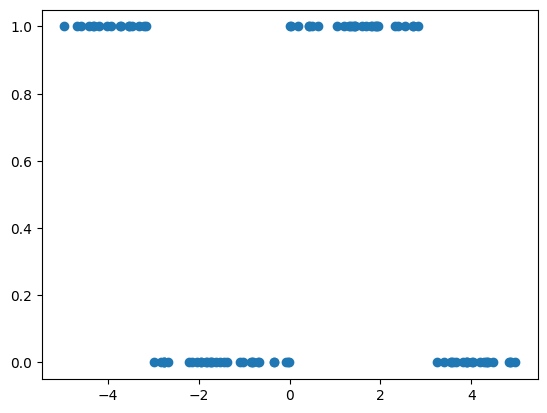

In [9]:
np.random.seed(9102)
import scipy
Y_binomial = np.random.binomial(n=1, p=scipy.special.expit(Y))
plt.scatter(X, Y_binomial)
plt.show()

In [10]:
logistic_gp = model_classes.VarGP(
    X=X,
    Y=Y_binomial,
    kernel=gpflow.kernels.SquaredExponential(),
    likelihood='bernoulli',
    verbose=True # Can set this option to see what is going on (default: False)
)

In [11]:
# logistic_gp.randomize_params()
# Optimization parameters can also be customized if interested
logistic_gp.optimize_params(
    data=(X, Y_binomial)
    # adam_learning_rate=0.00001,
    # convergence_threshold=1e-3,
    # num_opt_iter=20000
)
logistic_gp

Number of params: 104,  using Scipy optimizer
╒═══════════════════════════╤═══════════╤════════════════╤═════════╤═════════════╤═══════════════╤═════════╤══════════════════╕
│ name                      │ class     │ transform      │ prior   │ trainable   │ shape         │ dtype   │ value            │
╞═══════════════════════════╪═══════════╪════════════════╪═════════╪═════════════╪═══════════════╪═════════╪══════════════════╡
│ VarGP.mean_function.c     │ Parameter │ Identity       │         │ True        │ ()            │ float64 │ 0.0              │
├───────────────────────────┼───────────┼────────────────┼─────────┼─────────────┼───────────────┼─────────┼──────────────────┤
│ VarGP.kernel.variance     │ Parameter │ Softplus       │         │ True        │ ()            │ float64 │ 1.0              │
├───────────────────────────┼───────────┼────────────────┼─────────┼─────────────┼───────────────┼─────────┼──────────────────┤
│ VarGP.kernel.lengthscales │ Parameter │ Softplus       │

name,class,transform,prior,trainable,shape,dtype,value
VarGP.mean_function.c,Parameter,Identity,,True,(),float64,-2.11153
VarGP.kernel.variance,Parameter,Softplus,,True,(),float64,230.6506
VarGP.kernel.lengthscales,Parameter,Softplus,,True,(),float64,1.46011
VarGP.inducing_variable.Z,Parameter,Identity,,False,"(100, 1)",float64,[[-4.02011...
VarGP.q_mu,Parameter,Identity,,True,"(100, 1)",float64,[[1.04510000e+00...
VarGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 100, 100)",float64,"[[[2.64540025e-01, 0.00000000e+00, 0.00000000e+00..."


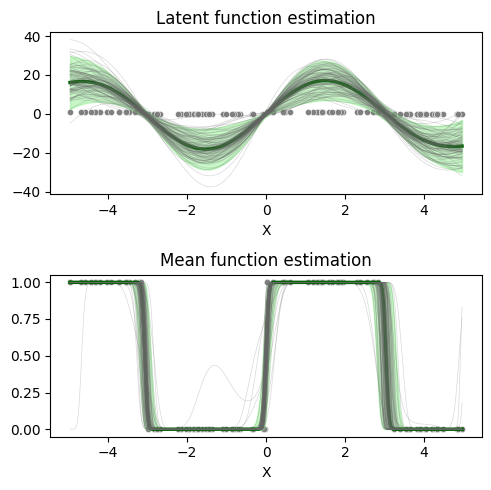

In [12]:
# Now plot the resulting model predictions
figs, axs = plt.subplots(2, 1, figsize=(5, 5))
logistic_gp.plot_functions(data=(X, Y_binomial), x_idx=0, col_names=['X'], predict_type='func', ax=axs[0])
axs[0].set_title('Latent function estimation')

logistic_gp.plot_functions(data=(X, Y_binomial), x_idx=0, col_names=['X'], predict_type='mean', ax=axs[1])
axs[1].set_title('Mean function estimation')

figs.tight_layout()
plt.show()

## Negative Binomial

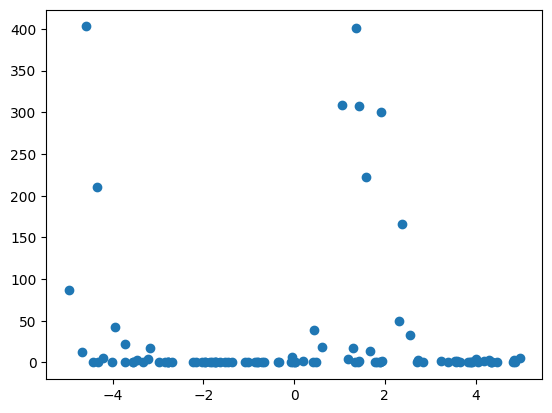

In [13]:

nb = likelihoods.NegativeBinomial(alpha=5)

def nb_sample(nb, X, Y):
    m = nb.invlink(Y) #* zinb.scale
    var = m + nb.alpha * m ** 2
    p = m / var
    n = m ** 2 / (var - m)
    np.random.seed(9102)
    intensity_val = np.random.negative_binomial(
        n=n,
        p=p
    )
    return intensity_val

# Y_zinb = zinb._conditional_mean(X, Y).numpy()
# Y_zinb = likelihoods.ZeroInflatedNegativeBinomial().invlink(Y).numpy()
Y_nb = nb_sample(nb, X, Y).astype(float)
plt.scatter(X, Y_nb)

In [14]:
nb_gp = model_classes.VarGP(
    X=X,
    Y=Y_nb,
    kernel=gpflow.kernels.SquaredExponential(),
    likelihood='negativebinomial'
)
nb_gp.optimize_params(data=(X, Y_nb))

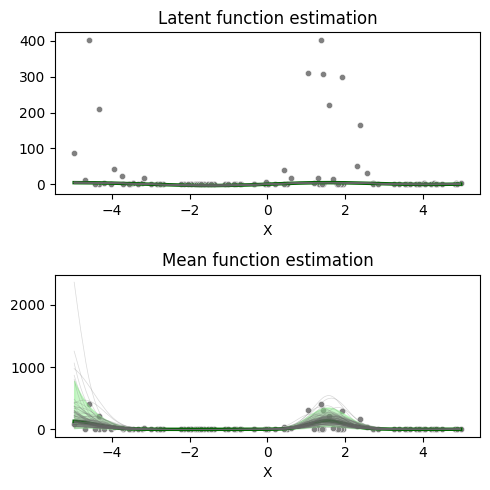

In [15]:
figs, axs = plt.subplots(2, 1, figsize=(5, 5))
nb_gp.plot_functions(data=(X, Y_nb), x_idx=0, col_names=['X'], predict_type='func', ax=axs[0])
axs[0].set_title('Latent function estimation')
nb_gp.plot_functions(data=(X, Y_nb), x_idx=0, col_names=['X'], predict_type='mean', ax=axs[1])
axs[1].set_title('Mean function estimation')
figs.tight_layout()
plt.show()

In [16]:
calc_deviance_explained(
    nb_gp,
    data=(X, Y_nb),
    model_mu=nb_gp.predict_y(X)[0],
    model_var=nb_gp.predict_y(X)[1]
)

0.5216589385077736

## Inducing points

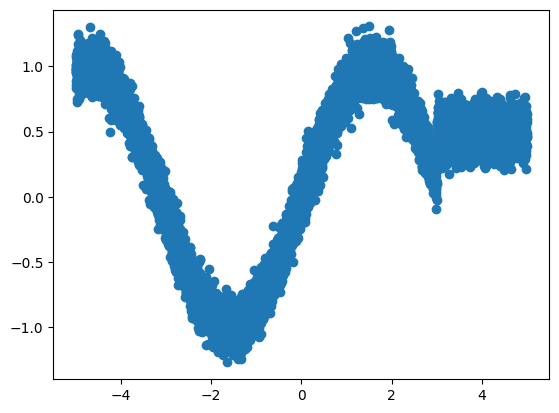

In [17]:
# Simulate some data
np.random.seed(9102)
X_big = np.random.uniform(low=-5, high=5, size=(100*N, 1))
Y_big = np.sin(X_big)
Y_big[X_big >= 3] = 0.5
Y_big += np.random.normal(scale=.1, size=(100*N, 1))
plt.scatter(X_big, Y_big)

In [18]:
sgp = model_classes.SparseGP(
    X=X_big,
    Y=Y_big,
    kernel=gpflow.kernels.SquaredExponential(),
    num_inducing_points=10,
    random_seed=9102
)
sgp

name,class,transform,prior,trainable,shape,dtype,value
SparseGP.mean_function.c,Parameter,Identity,,True,(),float64,0.0
SparseGP.kernel.variance,Parameter,Softplus,,True,(),float64,1.0
SparseGP.kernel.lengthscales,Parameter,Softplus,,True,(),float64,1.0
SparseGP.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,1.0
SparseGP.inducing_variable.Z,Parameter,Identity,,True,"(10, 1)",float64,[[-2.57471...
SparseGP.q_mu,Parameter,Identity,,True,"(10, 1)",float64,[[0....
SparseGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 10, 10)",float64,"[[[1., 0., 0...."


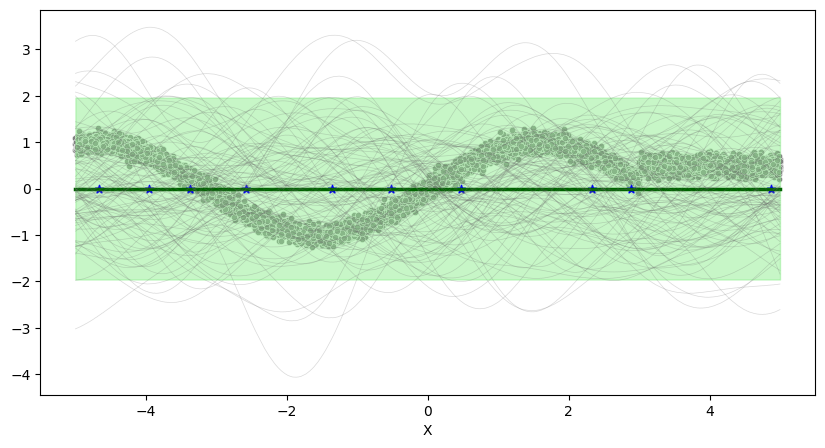

In [19]:
# Plot original points with inducing points
sgp.plot_functions(data=(X_big, Y_big), x_idx=0, col_names=['X'])
plt.scatter(
    sgp.inducing_variable.Z, 
    np.zeros_like(sgp.inducing_variable.Z), 
    color='blue', 
    marker='*'
)

In [20]:
sgp

name,class,transform,prior,trainable,shape,dtype,value
SparseGP.mean_function.c,Parameter,Identity,,True,(),float64,0.0
SparseGP.kernel.variance,Parameter,Softplus,,True,(),float64,1.0
SparseGP.kernel.lengthscales,Parameter,Softplus,,True,(),float64,1.0
SparseGP.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,1.0
SparseGP.inducing_variable.Z,Parameter,Identity,,True,"(10, 1)",float64,[[-2.57471...
SparseGP.q_mu,Parameter,Identity,,True,"(10, 1)",float64,[[0....
SparseGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 10, 10)",float64,"[[[1., 0., 0...."


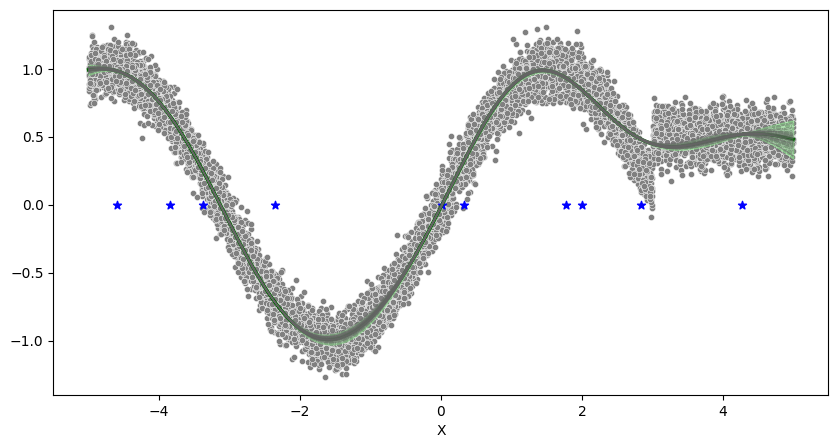

In [21]:
# Now optimize parameters (inclduing inducing points) and plot results
sgp.optimize_params(data=(X_big, Y_big))
sgp.plot_functions(data=(X_big, Y_big), x_idx=0, col_names=['X'])
plt.scatter(
    sgp.inducing_variable.Z, 
    np.zeros_like(sgp.inducing_variable.Z), 
    color='blue', 
    marker='*'
)

In [22]:
calc_deviance_explained(
    sgp,
    data=(X_big, Y_big),
    model_mu=sgp.predict_y(X_big)[0],
    model_var=sgp.predict_y(X_big)
)

0.9720344415257874

## Penalized GP

In [23]:
pgp = model_classes.PenalizedGP(
    X=X,
    Y=Y,
    penalization_factor=10.
)

In [24]:
pgp.optimize_params(data=(X, Y))
pgp

name,class,transform,prior,trainable,shape,dtype,value
PenalizedGP.mean_function.c,Parameter,Identity,,True,(),float64,1.13165
PenalizedGP.kernel.variance,Parameter,Softplus,Exponential,True,(),float64,1.61631
PenalizedGP.kernel.lengthscales,Parameter,Softplus,,True,(),float64,0.9874157906198167
PenalizedGP.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,0.009117462529557564
PenalizedGP.inducing_variable.Z,Parameter,Identity,,False,"(100, 1)",float64,[[-4.02011...
PenalizedGP.q_mu,Parameter,Identity,,True,"(100, 1)",float64,[[2.13313000e+00...
PenalizedGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 100, 100)",float64,"[[[2.98129943e-02, 0.00000000e+00, 0.00000000e+00..."


In [25]:
# Search over penalization factors
# pgp.penalization_search(data=(X, Y))

In [26]:
print(f'GP new penalization factor: {pgp.penalization_factor}')
pgp

GP new penalization factor: 10.0


name,class,transform,prior,trainable,shape,dtype,value
PenalizedGP.mean_function.c,Parameter,Identity,,True,(),float64,1.13165
PenalizedGP.kernel.variance,Parameter,Softplus,Exponential,True,(),float64,1.61631
PenalizedGP.kernel.lengthscales,Parameter,Softplus,,True,(),float64,0.9874157906198167
PenalizedGP.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,0.009117462529557564
PenalizedGP.inducing_variable.Z,Parameter,Identity,,False,"(100, 1)",float64,[[-4.02011...
PenalizedGP.q_mu,Parameter,Identity,,True,"(100, 1)",float64,[[2.13313000e+00...
PenalizedGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 100, 100)",float64,"[[[2.98129943e-02, 0.00000000e+00, 0.00000000e+00..."


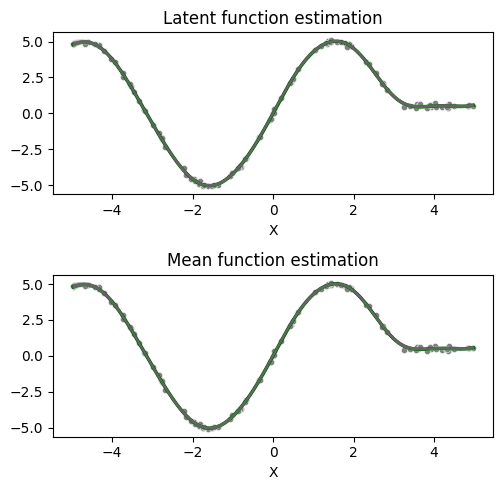

In [27]:
figs, axs = plt.subplots(2, 1, figsize=(5, 5))
pgp.plot_functions(data=(X, Y), x_idx=0, col_names=['X'], predict_type='func', ax=axs[0])
axs[0].set_title('Latent function estimation')
pgp.plot_functions(data=(X, Y), x_idx=0, col_names=['X'], predict_type='mean', ax=axs[1])
axs[1].set_title('Mean function estimation')
figs.tight_layout()
plt.show()

In [28]:
calc_deviance_explained(
    pgp,
    data=(X, Y),
    model_mu=pgp.predict_y(X)[0],
    model_var=pgp.predict_y(X)[1]
)

0.9992732697115652

## Putting it all together

In [29]:
Y_nb_big = nb_sample(nb, X_big, Y_big).astype(float)
psvgp = model_classes.PSVGP(
    X=X_big,
    Y=Y_nb_big,
    penalized_options={'penalization_factor': 0.1},
    sparse_options={'num_inducing_points': 100},
    variational_options={'likelihood': 'negativebinomial'}
)
psvgp

name,class,transform,prior,trainable,shape,dtype,value
PSVGP.mean_function.c,Parameter,Identity,,True,(),float64,0.0
PSVGP.kernel.variance,Parameter,Softplus,Exponential,True,(),float64,1.0
PSVGP.kernel.lengthscales,Parameter,Softplus,,True,(),float64,1.0
PSVGP.likelihood.alpha,Parameter,Softplus,,True,(),float64,1.0
PSVGP.inducing_variable.Z,Parameter,Identity,,True,"(100, 1)",float64,[[3.03712...
PSVGP.q_mu,Parameter,Identity,,True,"(100, 1)",float64,[[0....
PSVGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 100, 100)",float64,"[[[1., 0., 0...."


In [30]:
psvgp.optimize_params(data=(X_big, Y_nb_big), optimizer="adam")
psvgp

name,class,transform,prior,trainable,shape,dtype,value
PSVGP.mean_function.c,Parameter,Identity,,True,(),float64,0.2246527886887429
PSVGP.kernel.variance,Parameter,Softplus,Exponential,True,(),float64,0.4274636483088255
PSVGP.kernel.lengthscales,Parameter,Softplus,,True,(),float64,1.51022
PSVGP.likelihood.alpha,Parameter,Softplus,,True,(),float64,4.62238
PSVGP.inducing_variable.Z,Parameter,Identity,,True,"(100, 1)",float64,[[2.36064...
PSVGP.q_mu,Parameter,Identity,,True,"(100, 1)",float64,[[8.66159669e-01...
PSVGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 100, 100)",float64,"[[[-9.36392092e-02, 0.00000000e+00, 0.00000000e+00..."


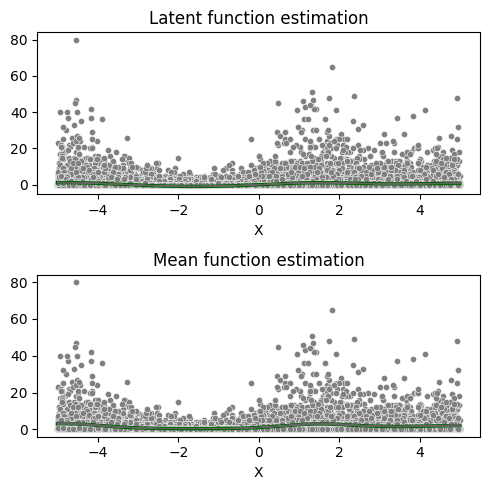

In [31]:
figs, axs = plt.subplots(2, 1, figsize=(5, 5))
psvgp.plot_functions(data=(X_big, Y_nb_big), x_idx=0, col_names=['X'], predict_type='func', ax=axs[0])
axs[0].set_title('Latent function estimation')
psvgp.plot_functions(data=(X_big, Y_nb_big), x_idx=0, col_names=['X'], predict_type='mean', ax=axs[1])
axs[1].set_title('Mean function estimation')
figs.tight_layout()
plt.show()

In [32]:
from scipy.stats import nbinom

Y_nb_big.mean()
Y_nb_big.var()

19.031999000000003

In [33]:
saturated_mu = Y_nb_big  + 1e-6
saturated_var = saturated_mu + 1e-6
saturated_n = (saturated_mu)**2 / (saturated_var - saturated_mu)
saturated_p = saturated_mu / saturated_var
nbinom.logpmf(k=Y_nb_big, n=saturated_n, p=saturated_p).sum()

-4908.154894476221

In [34]:
intercept_mu = Y_nb_big.mean()
intercept_var = Y_nb_big.var()
intercept_n = (intercept_mu)**2 / (intercept_var - intercept_mu)
intercept_p = intercept_mu / intercept_var

nbinom.logpmf(k=Y_nb_big, n=intercept_n, p=intercept_p).sum()

-14230.098529692741

In [35]:
model_mu, model_var = psvgp.predict_y(X_big)
model_n = (model_mu)**2 / (model_var - model_mu)
model_p = model_mu / model_var

nbinom.logpmf(k=Y_nb_big, n=model_n, p=model_p).sum()

-13891.384618960754

In [36]:
1 - ((-4908 - -13891) / (-4908 - -14230))

0.036365586783951964

In [37]:
calc_deviance_explained(
    psvgp,
    data=(X_big, Y_nb_big),
    model_mu=psvgp.predict_y(X_big)[0],
    model_var=psvgp.predict_y(X_big)[1]
)

0.09161208929739473

In [38]:
# log_dens_fn = None
# l_example = "negative_binomial" 
# y = Y_nb_big # _binomial.astype(float)
# mod_mu_, mod_var_ = psvgp.predict_y(X_big)
# # y = Y_binomial.astype(float)
# # l_example = "bernoulli"# "gaussian"
# # mod_mu_, mod_var_ = logistic_gp.predict_y(X)

# try:
#     log_dens_fn = getattr(gpflow.logdensities, l_example)
# except AttributeError:
#     log_dens_fn = getattr(scipy.stats, "nbinom" if l_example == "negative_binomial" else l_example).pmf 

# if l_example == "gaussian":
#     sat_ll = log_dens_fn(
#         x=y,
#         mu=y,
#         var=np.var(y)
#     )
#     int_ll = log_dens_fn(
#         x=y,
#         mu=np.mean(y),
#         var=np.var(y)
#     )
#     mod_ll = log_dens_fn(
#         x=y,
#         mu=mod_mu_,
#         var=np.var(y), #mod_var_,
#     )
# elif l_example in ["bernoulli", "poisson"]:
#     sat_ll = log_dens_fn(
#         y, y
#     )
#     int_ll = log_dens_fn(
#         y, np.mean(y)
#     )
#     mod_ll = log_dens_fn(
#         y, mod_mu_
#     )
# elif l_example == "negative_binomial":
#     mu_ = y
#     mu_[mu_ < 1] = 1
#     var_ = mu_ + 1 #max(1, np.var(y))

#     n = (mu_)**2 / (var_ - mu_)
#     # n[n < 1] = 1
#     p = mu_ / var_
#     print(f"{n[:5]=}, {p[:5]=}")
#     sat_ll = log_dens_fn(y, n, p)
#     print(f"{sat_ll=}")

#     mu_ = max(1, np.mean(y))
#     var_ = max(1, np.var(y))
#     n = (mu_)**2 / (var_ - mu_)
#     # n = max(1, n)
#     p = mu_ / var_
#     int_ll = log_dens_fn(y, n, p)

#     n = ((mod_mu_)**2 / (mod_var_ - mod_mu_)).numpy()
#     # n[n < 1] = 1
#     p = mod_mu_ / mod_var_
#     mod_ll = log_dens_fn(y, n, p)
# else:
#     raise ValueError("Unknown likelihood to calculate deviance")

# # Null deviance should always be greater than model deviance!
# null_deviance = 2 * np.sum(sat_ll - int_ll)
# mod_deviance = 2 * np.sum(sat_ll - mod_ll)
# # null_deviance = 2 * np.sum(-int_ll)
# # mod_deviance = 2 * np.sum(-mod_ll)
# print(f"{sum(sat_ll)=}, {sum(int_ll)=}, {sum(mod_ll)=}")
# print(f"{null_deviance=}, {mod_deviance=}")

# deviance_explained = 1 - (mod_deviance / null_deviance)
# deviance_explained

## GP Search Class

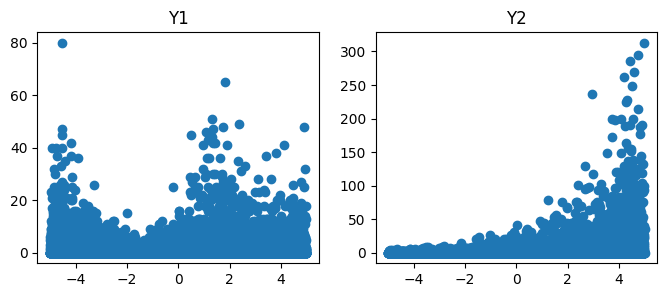

In [39]:
pd_X = pd.DataFrame(
    data=X_big, #[:1000, :],
    columns=['X']
)
pd_Y = pd.DataFrame(
    data=Y_nb_big, #[:1000, :],
    columns=['Y1']
)
pd_Y['Y2'] = nb_sample(nb, pd_X['X'], 0.5*pd_X['X'] + 0.5).astype(float)

figs, axs = plt.subplots(1, 2, figsize=(8,3))
axs[0].scatter(pd_X, pd_Y['Y1'])
axs[0].set_title('Y1')
axs[1].scatter(pd_X, pd_Y['Y2'])
axs[1].set_title('Y2')

gps = model_search.GPSearch(
    X=pd_X,
    Y=pd_Y,
    outcome_likelihood='negativebinomial',
    Y_transform=None
)

In [40]:
gps.run_penalized_search(
    # num_jobs=6,
    kernel_options={'kerns': [gpflow.kernels.SquaredExponential(), gpflow.kernels.Matern12()]},
    # sparse_options={'num_inducing_points': 100},
    # optimization_options={'num_opt_iter': 500},
    search_options={
        'random_seed': 9102,
        "num_restart": 1,
        # "penalization_factor_list": [1.0]
    },
)

GPPenalized:  60%|██████    | 18/30 [03:20<02:13, 11.12s/it]


In [41]:
gps.models["Y2"].penalization_factor

<tf.Tensor: shape=(), dtype=float64, numpy=100.0>

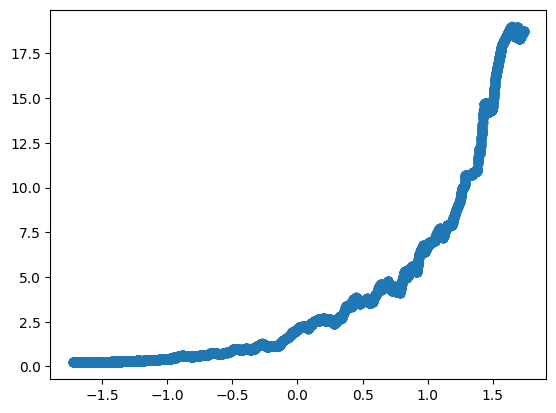

In [42]:
plt.scatter(
    gps.X,
    gps.models["Y2"].predict_y(gps.X)[0]
)

In [43]:
from waveome.utilities import calc_deviance_explained

calc_deviance_explained(
    model=gps.models["Y1"],
    data=(gps.X, gps.Y["Y1"]),
    model_mu=gps.models["Y1"].predict_y(gps.X)[0],
    model_var=gps.models["Y1"].predict_y(gps.X)[1],
)

-10520.557229876955

In [44]:
gps.models["Y1"].likelihood.alpha

<Parameter: name=softplus, dtype=float64, shape=[], fn="softplus", numpy=5.415793645215405>

In [45]:
from waveome.utilities import calc_deviance_explained_components


calc_deviance_explained_components(model=gps.models["Y1"], data=(gps.X, gps.Y["Y1"]))

[-10520.557, 10521.557]

In [46]:
np.var(gps.Y["Y1"])

19.031999000000003

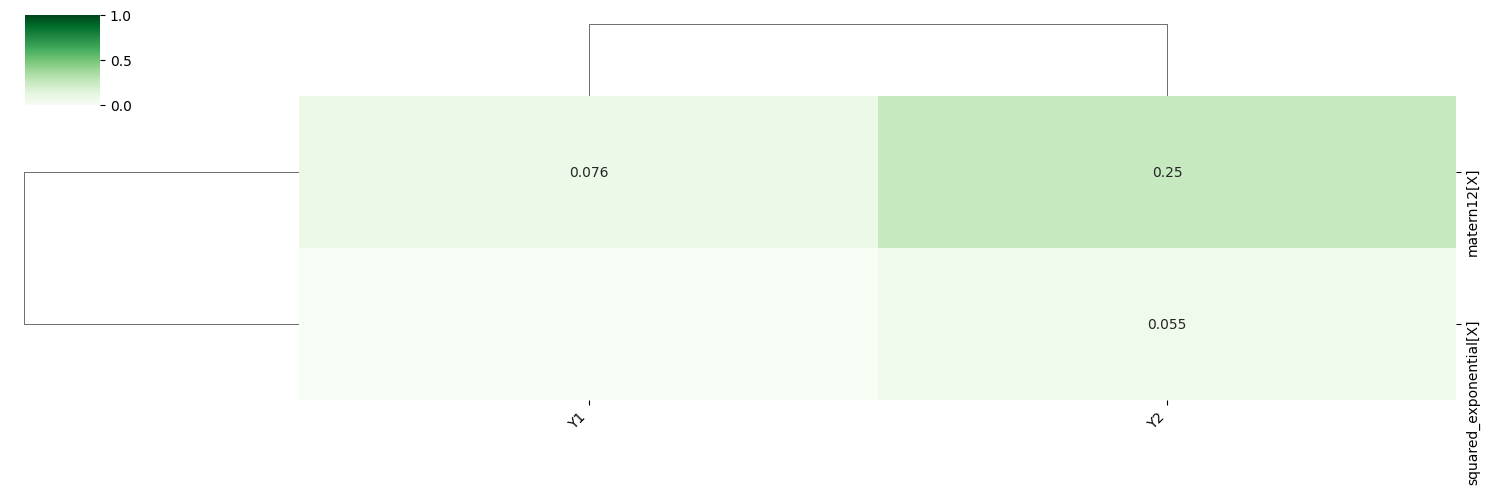

In [47]:
# Something still seems off here with the filtering of values
gps.plot_heatmap(var_cutoff=0)

(<Figure size 2000x500 with 2 Axes>,
 array([[<Axes: title={'center': 'matern12[X](7.6%)'}, xlabel='X'>,
         <Axes: title={'center': 'residuals (92.4%)'}, xlabel='X'>,
         <Axes: >, <Axes: >]], dtype=object))

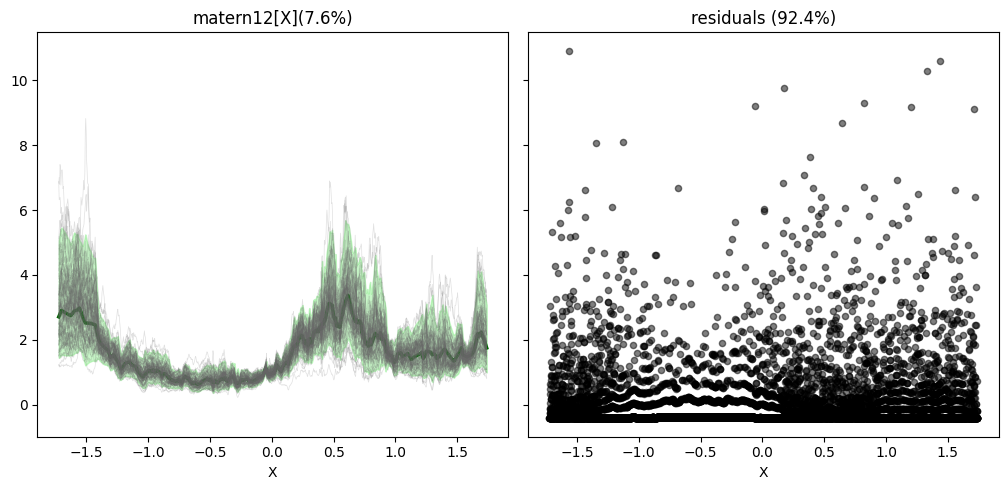

In [48]:
gps.plot_parts(out_label='Y1', x_axis_label='X')#, conf_level_val=0.1)

(<Figure size 2000x500 with 3 Axes>,
 array([[<Axes: title={'center': 'squared_exponential[X](5.5%)'}, xlabel='X'>,
         <Axes: title={'center': 'matern12[X](25.0%)'}, xlabel='X'>,
         <Axes: title={'center': 'residuals (69.5%)'}, xlabel='X'>,
         <Axes: >]], dtype=object))

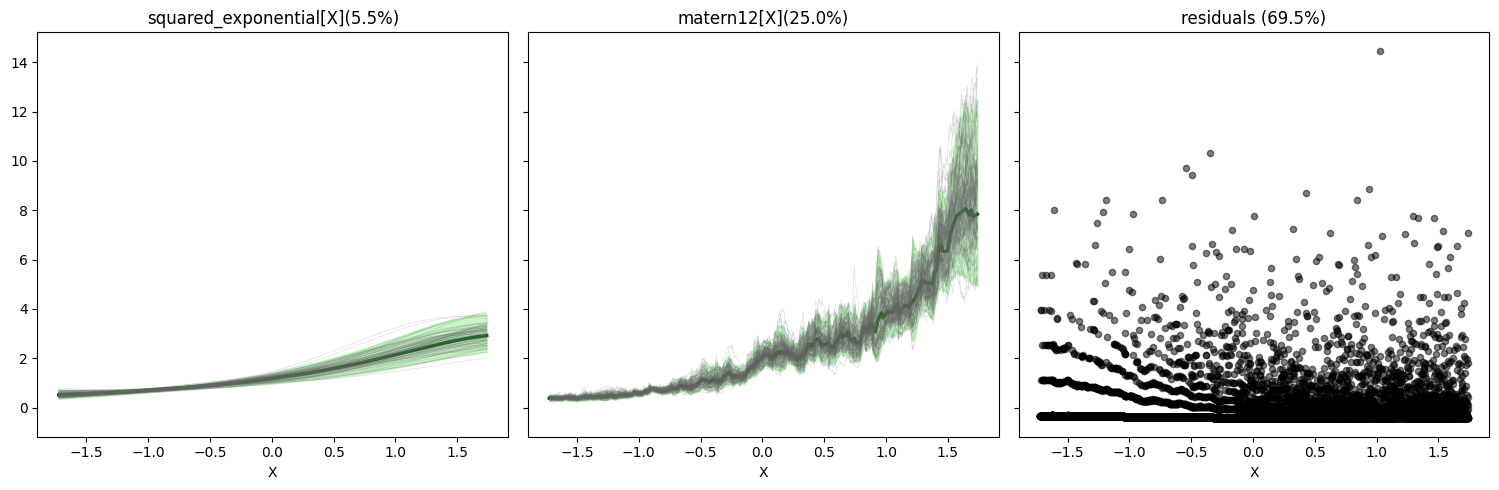

In [49]:
gps.plot_parts(out_label='Y2', x_axis_label='X')#, conf_level_val=0)
# plt.yscale('log')

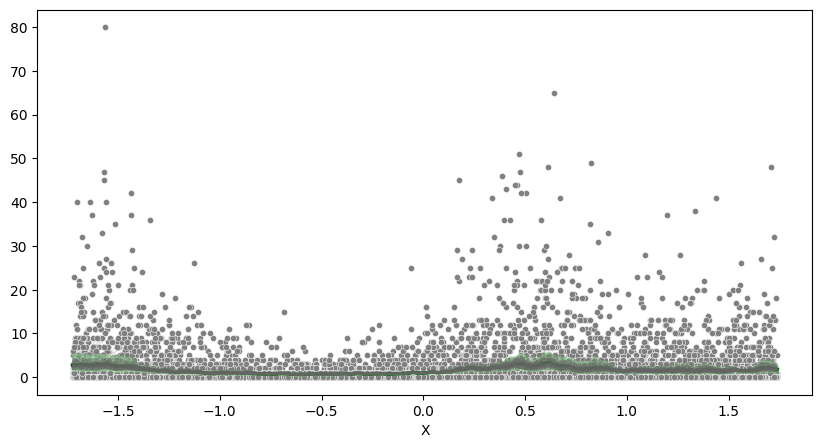

In [50]:
gps.plot_marginal(out_label="Y1", x_axis_label="X")#, reverse_transform_axes=True)
# plt.yscale("log")
plt.show()

## Account for multiple time-specific effects

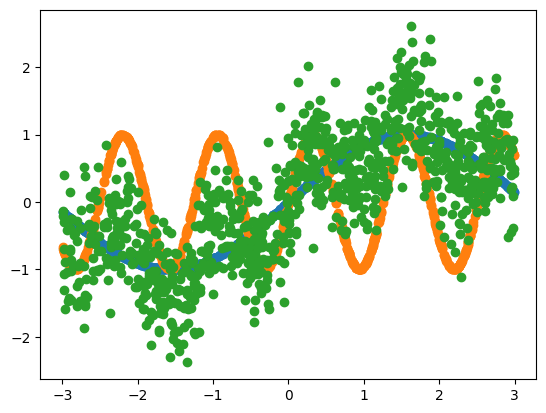

In [51]:
# Multiple time components with different lengthscales
# Libraries
import gpflow
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from waveome import (
    model_classes,
    kernels,
    model_search,
    likelihoods,
    utilities
)


np.random.seed(9102)
n = 1000
x_time = np.random.uniform(low=-3, high=3, size=n)
y_time = np.sin(x_time) 
y_time2 = np.sin(5*x_time)
y_time_out = y_time + 0.5*y_time2 + np.random.normal(scale=0.5, size=n)

plt.scatter(x_time, y_time)
plt.scatter(x_time, y_time2)
plt.scatter(x_time, y_time_out)

In [52]:
gps_time = model_search.GPSearch(
    X=pd.DataFrame({
        "time": x_time
    }),
    Y=pd.DataFrame({
        "y_mixed": y_time_out
    }),
    outcome_likelihood="gaussian",
)

gps_time.penalized_optimization(optimization_options={'num_opt_iter': 500})

Building 1 models...
Finished 1 models (100%), elapsed time: 0.2 minutes


In [53]:
gps_time.models["y_mixed"]

name,class,transform,prior,trainable,shape,dtype,value
PSVGP.mean_function.c,Parameter,Identity,,True,"(1,)",float64,[0.10533768]
PSVGP.kernel.variance,Parameter,Softplus,,True,(),float64,1.0
PSVGP.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,0.3428919980769476
PSVGP.inducing_variable.Z,Parameter,Identity,,True,"(100, 1)",float64,[[0.73400255...
PSVGP.q_mu,Parameter,Identity,,True,"(100, 1)",float64,[[2.88324000e+00...
PSVGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 100, 100)",float64,"[[[-8.94393855e-02, 0.00000000e+00, 0.00000000e+00..."


(<Figure size 500x500 with 1 Axes>,
 <Axes: title={'center': 'residuals (100%)'}, xlabel='time'>)

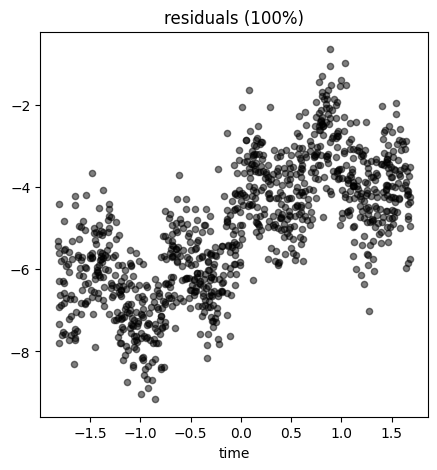

In [54]:
gps_time.plot_parts(out_label="y_mixed", x_axis_label="time")

<Axes: xlabel='time'>

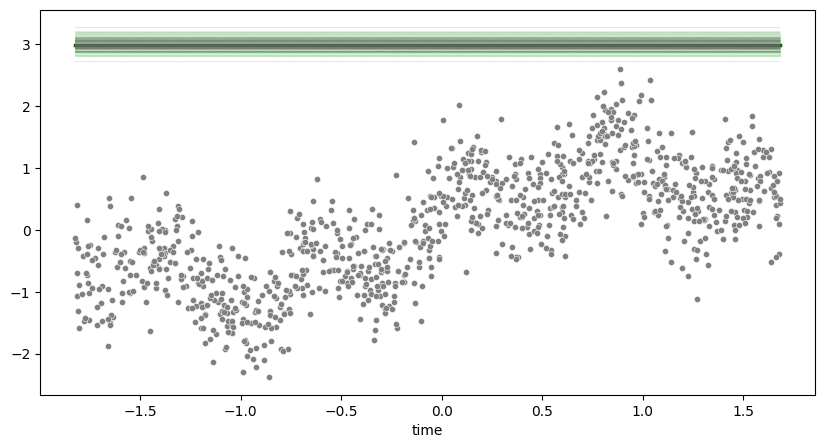

In [55]:
gps_time.plot_marginal(out_label="y_mixed", x_axis_label="time")

It seems as if we are missing a good amount of the time trend just using one kernel. Let's add to the model complexity.

In [56]:
# Now add two time columns
gps_time2 = model_search.GPSearch(
    X=pd.DataFrame({
        "time1": x_time,
        "time2": x_time
    }),
    Y=pd.DataFrame({
        "y_mixed": y_time_out
    }),
    outcome_likelihood="gaussian"
)

# If we don't want to search over penalization terms
# gps_time2.penalized_optimization(
#     random_seed=9102,
#     kernel_options={
#         "second_order_numeric": False,
#         "kerns": [
#             gpflow.kernels.SquaredExponential(), 
#             gpflow.kernels.Periodic(base_kernel=gpflow.kernels.SquaredExponential())
#         ]
#     }
# )

# If we do want to search over penalization terms
gps_time2.run_penalized_search(
    random_seed=9102,
    kernel_options={
        "second_order_numeric": False,
        "kerns": [
            gpflow.kernels.SquaredExponential(), 
            gpflow.kernels.Periodic(base_kernel=gpflow.kernels.SquaredExponential())
        ]
    },
    # optimization_options={"optimizer": "adam"}
)

GPPenalized:  60%|██████    | 9/15 [01:06<00:44,  7.44s/it]


In [57]:
# Which penalization factor was chosen?
gps_time2.models["y_mixed"].penalization_factor

<tf.Tensor: shape=(), dtype=float64, numpy=0.0>

(<Figure size 2000x500 with 4 Axes>,
 array([[<Axes: title={'center': 'squared_exponential[time1](73.8%)'}, xlabel='time1'>,
         <Axes: title={'center': 'periodic[time1](-6.3%)'}, xlabel='time1'>,
         <Axes: title={'center': 'periodic[time2](-39.3%)'}, xlabel='time2'>,
         <Axes: title={'center': 'residuals (71.8%)'}, xlabel='time1'>]],
       dtype=object))

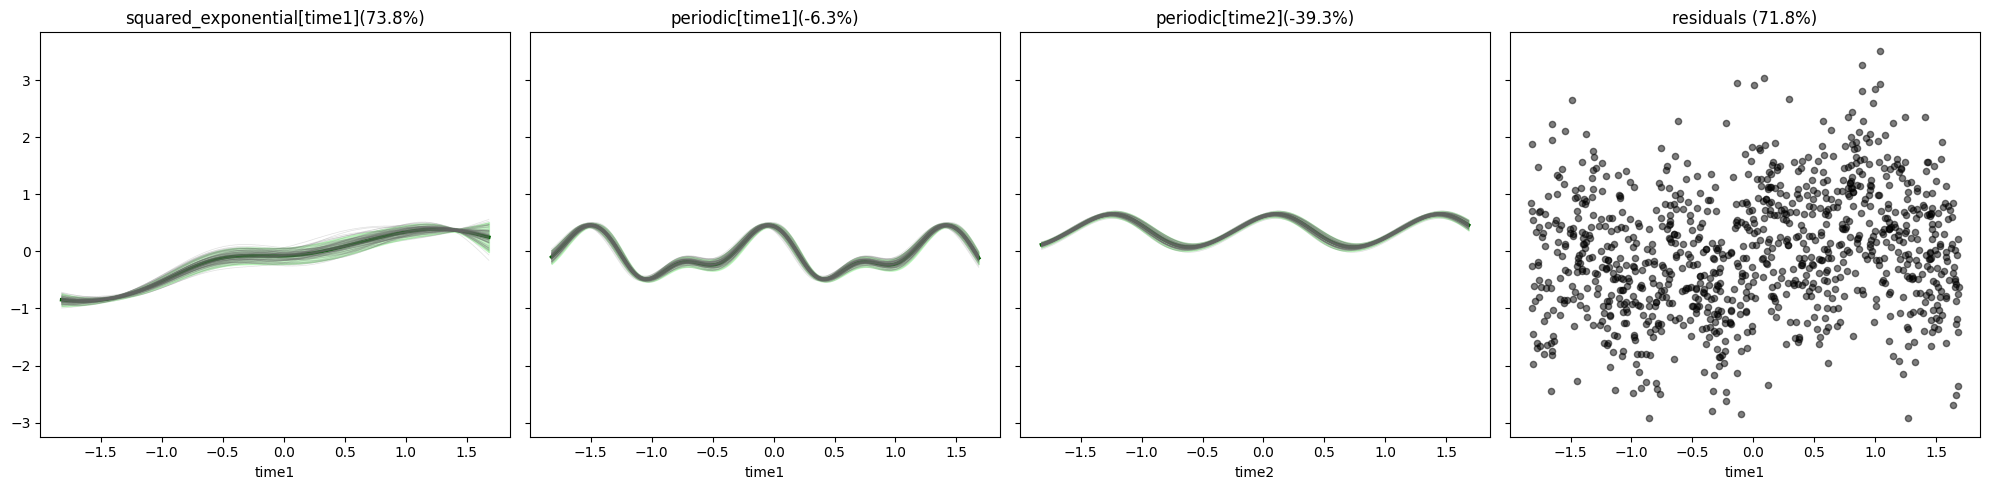

In [58]:
gps_time2.plot_parts(out_label="y_mixed", x_axis_label="time1")

In [59]:
from waveome.utilities import calc_rsquare


calc_rsquare(
    gps_time2.models["y_mixed"],
    data=(
        pd.DataFrame({
            "time1": x_time,
            "time2": x_time
        }).to_numpy(),
        pd.DataFrame({
            "y_mixed": y_time_out
        }).to_numpy()
    )
)

[0.358, 0.255, 0.258, 0.564]

In [60]:
from waveome.utilities import calc_deviance_explained_components


foo_hat_y = gps_time2.models["y_mixed"].predict_y(
    pd.DataFrame({
        "time1": x_time,
        "time2": x_time
    }).to_numpy()
)

calc_deviance_explained_components(
    gps_time2.models["y_mixed"],
    data=(
        pd.DataFrame({
            "time1": x_time,
            "time2": x_time
        }).to_numpy(),
        pd.DataFrame({
            "y_mixed": y_time_out
        }).to_numpy()
    ),
    # model_mu=foo_hat_y[0],#.numpy().flatten(),
    # model_var=foo_hat_y[1]#.numpy().flatten()
)

[0.426, -0.132, -0.107, 0.564]

In [61]:
# np.sum((y_time_out - foo_hat_y[0].numpy().flatten())**2)

In [62]:
# np.sum((y_time_out - np.mean(y_time_out))**2)

(<Figure size 2000x500 with 2 Axes>,
 array([[<Axes: title={'center': 'periodic[time1](-13.2%)'}, xlabel='time1'>,
         <Axes: title={'center': 'residuals (113.2%)'}, xlabel='time1'>,
         <Axes: >, <Axes: >]], dtype=object))

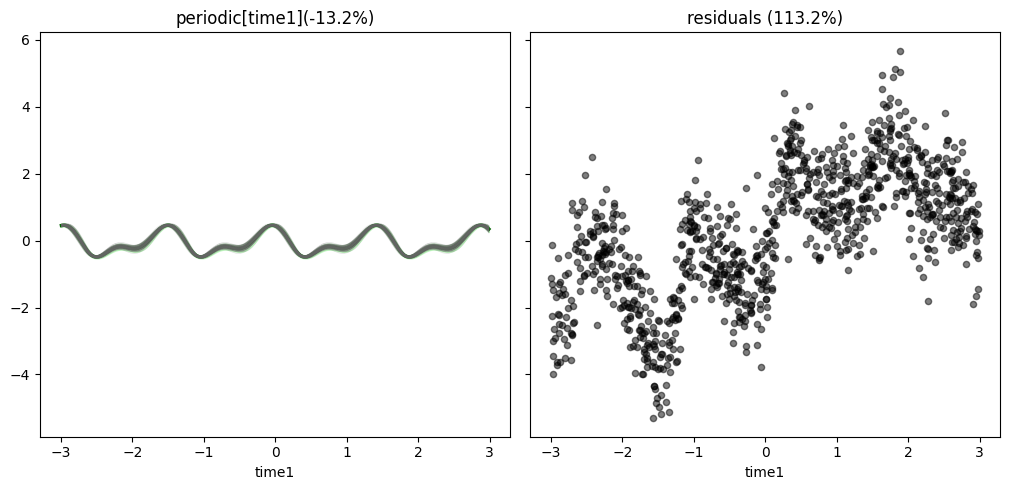

In [63]:
from waveome.predictions import pred_kernel_parts


foo = gpflow.utilities.deepcopy(gps_time2.models["y_mixed"])
foo.kernel = gps_time2.models["y_mixed"].kernel.kernels[1]
pred_kernel_parts(
    m=foo,
    x_idx=0,
    col_names=["time1", "time2"],
    data=(
        pd.DataFrame({
            "time1": x_time,
            "time2": x_time
        }).to_numpy(),
        pd.DataFrame({
            "y_mixed": y_time_out
        }).to_numpy()
    )
)

In [64]:
gps_time2.models["y_mixed"].variance_explained

ListWrapper([0.353, -0.03, -0.188, 0.343])

<Axes: xlabel='time1'>

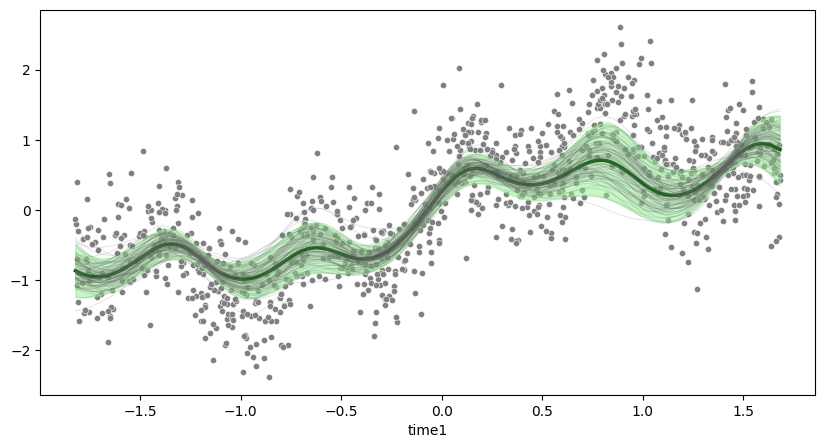

In [65]:
# Faster moving component
gps_time2.plot_marginal(out_label="y_mixed", x_axis_label="time1")

<Axes: xlabel='time2'>

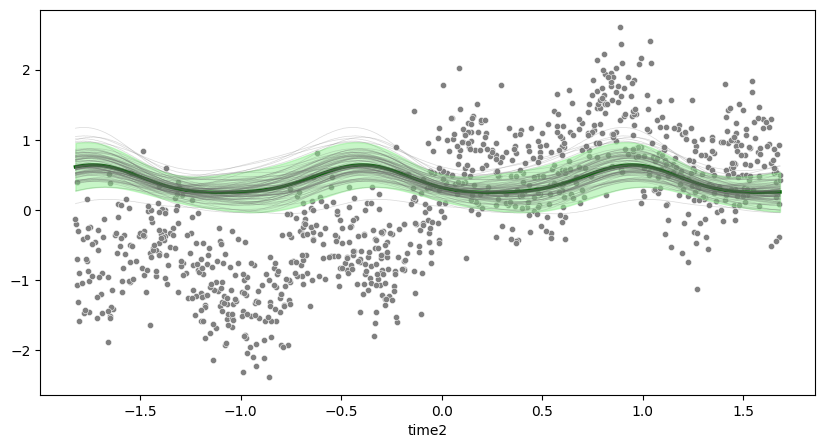

In [66]:
# Slower moving component
gps_time2.plot_marginal(out_label="y_mixed", x_axis_label="time2")